<a href="https://colab.research.google.com/github/mritunjoychk17/Dengue-Prediction-in-Bangladesh-Using-Machine-Learning/blob/main/DengueEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

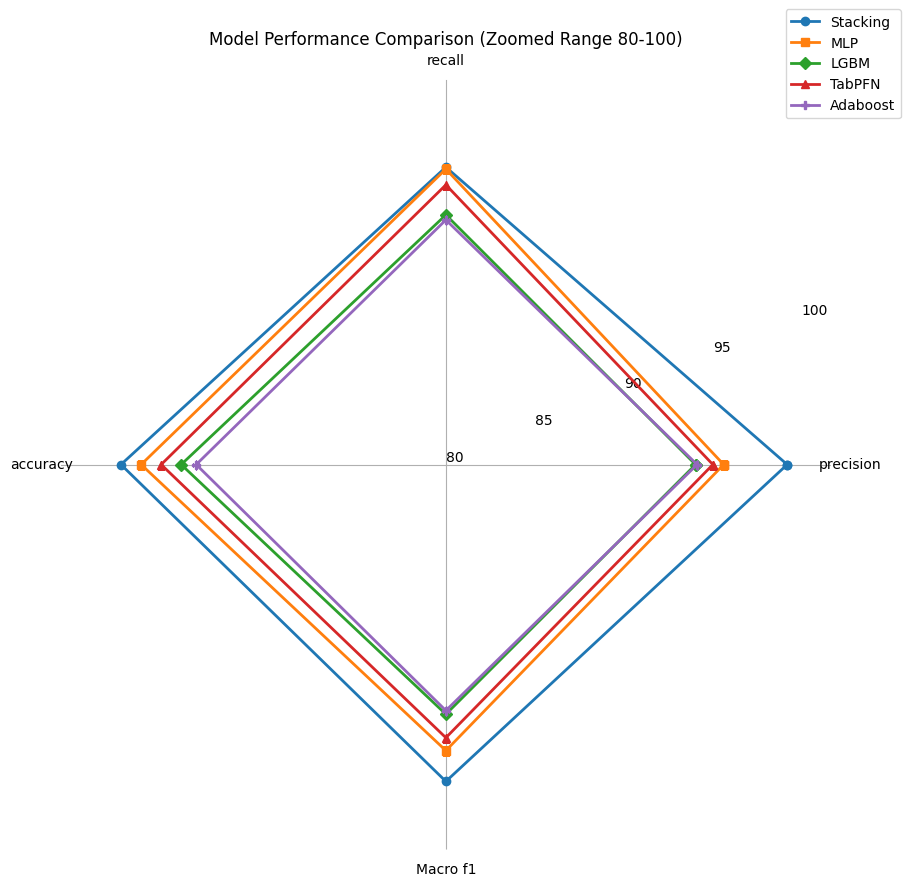

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their performance metrics
models = ['Stacking', 'MLP', 'LGBM', 'TabPFN', 'Adaboost']
metrics = ['precision', 'recall', 'accuracy', 'Macro f1']
values = [
    [97.73, 95.45, 96.88, 96.46],  # Stacking
    [94.43, 95.35, 95.83, 94.86],  # MLP
    [92.97, 92.97, 93.75, 92.97],  # LGBM
    [93.87, 94.53, 94.79, 94.19],  # TabPFN
    [93.05, 92.71, 92.97, 92.78]   # Adaboost
]

# Number of variables
num_vars = len(metrics)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Function to create the spider chart
def plot_spider_chart(models, metrics, values, ylim, yticks, title):
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Draw one axe per variable + add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)

    # Draw ylabels
    ax.set_ylim(*ylim)
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(y) for y in yticks])

    # Hide the circular grid lines
    ax.yaxis.grid(False)
    ax.xaxis.grid(True)

    # Hide the outer circle
    ax.spines['polar'].set_visible(False)

    markers = ['o', 's', 'D', '^', 'P']  # Different markers for each line

    for i, value in enumerate(values):
        data = value + value[:1]  # Complete the loop
        ax.plot(angles, data, label=models[i], marker=markers[i], linewidth=2)

    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.title(title)
    plt.show()

# Plot the spider chart with zoomed range
plot_spider_chart(models, metrics, values, ylim=(80, 100), yticks=[80, 85, 90, 95, 100], title='Model Performance Comparison (Zoomed Range 80-100)')


In [ ]:
data= pd.read_excel('/content/drive/MyDrive/Dengue Research/Report Dengue Dataset.xlsx')

In [ ]:
data = data.drop(columns = ['Serial','Date'])

In [ ]:
from sklearn.impute import SimpleImputer

columns_impute = ['ESR', 'Lymphocyte', 'Monocyte', 'Eosinophil', 'Basophil', 'RBC','Neutrophil']
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(data[columns_impute])
data[columns_impute] = imputer.transform(data[columns_impute])

In [ ]:
data.nunique()

Gender           2
Age             62
Haemoglobin     96
ESR             68
WBC            213
Neutrophil      69
Lymphocyte      66
Monocyte        19
Eosinophil      13
Basophil         4
RBC            201
Platelets      134
Result           2
dtype: int64

In [ ]:
data.isnull().sum()

Gender         0
Age            0
Haemoglobin    0
ESR            0
WBC            0
Neutrophil     0
Lymphocyte     0
Monocyte       0
Eosinophil     0
Basophil       0
RBC            0
Platelets      0
Result         0
dtype: int64

<Axes: >

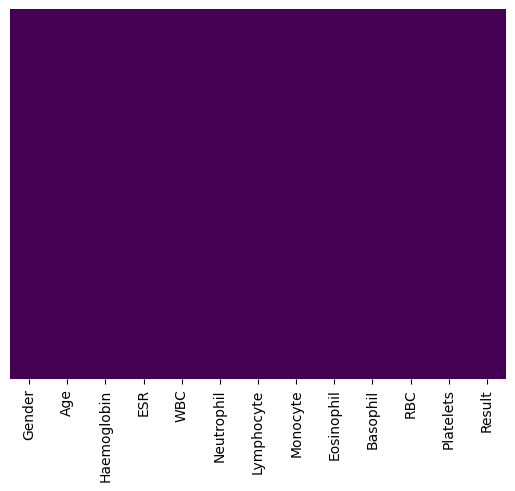

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Visualizing before and after removing outliers:


<ipython-input-15-202ee80cbaed>:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[z_scores < threshold]
<ipython-input-15-202ee80cbaed>:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[z_scores < threshold]
<ipython-input-15-202ee80cbaed>:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[z_scores < threshold]
<ipython-input-15-202ee80cbaed>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target_column, y=feature, data=df_before, ax=axes[i, 0], palette="pastel")
<ipython-input-15-202ee80cbaed>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

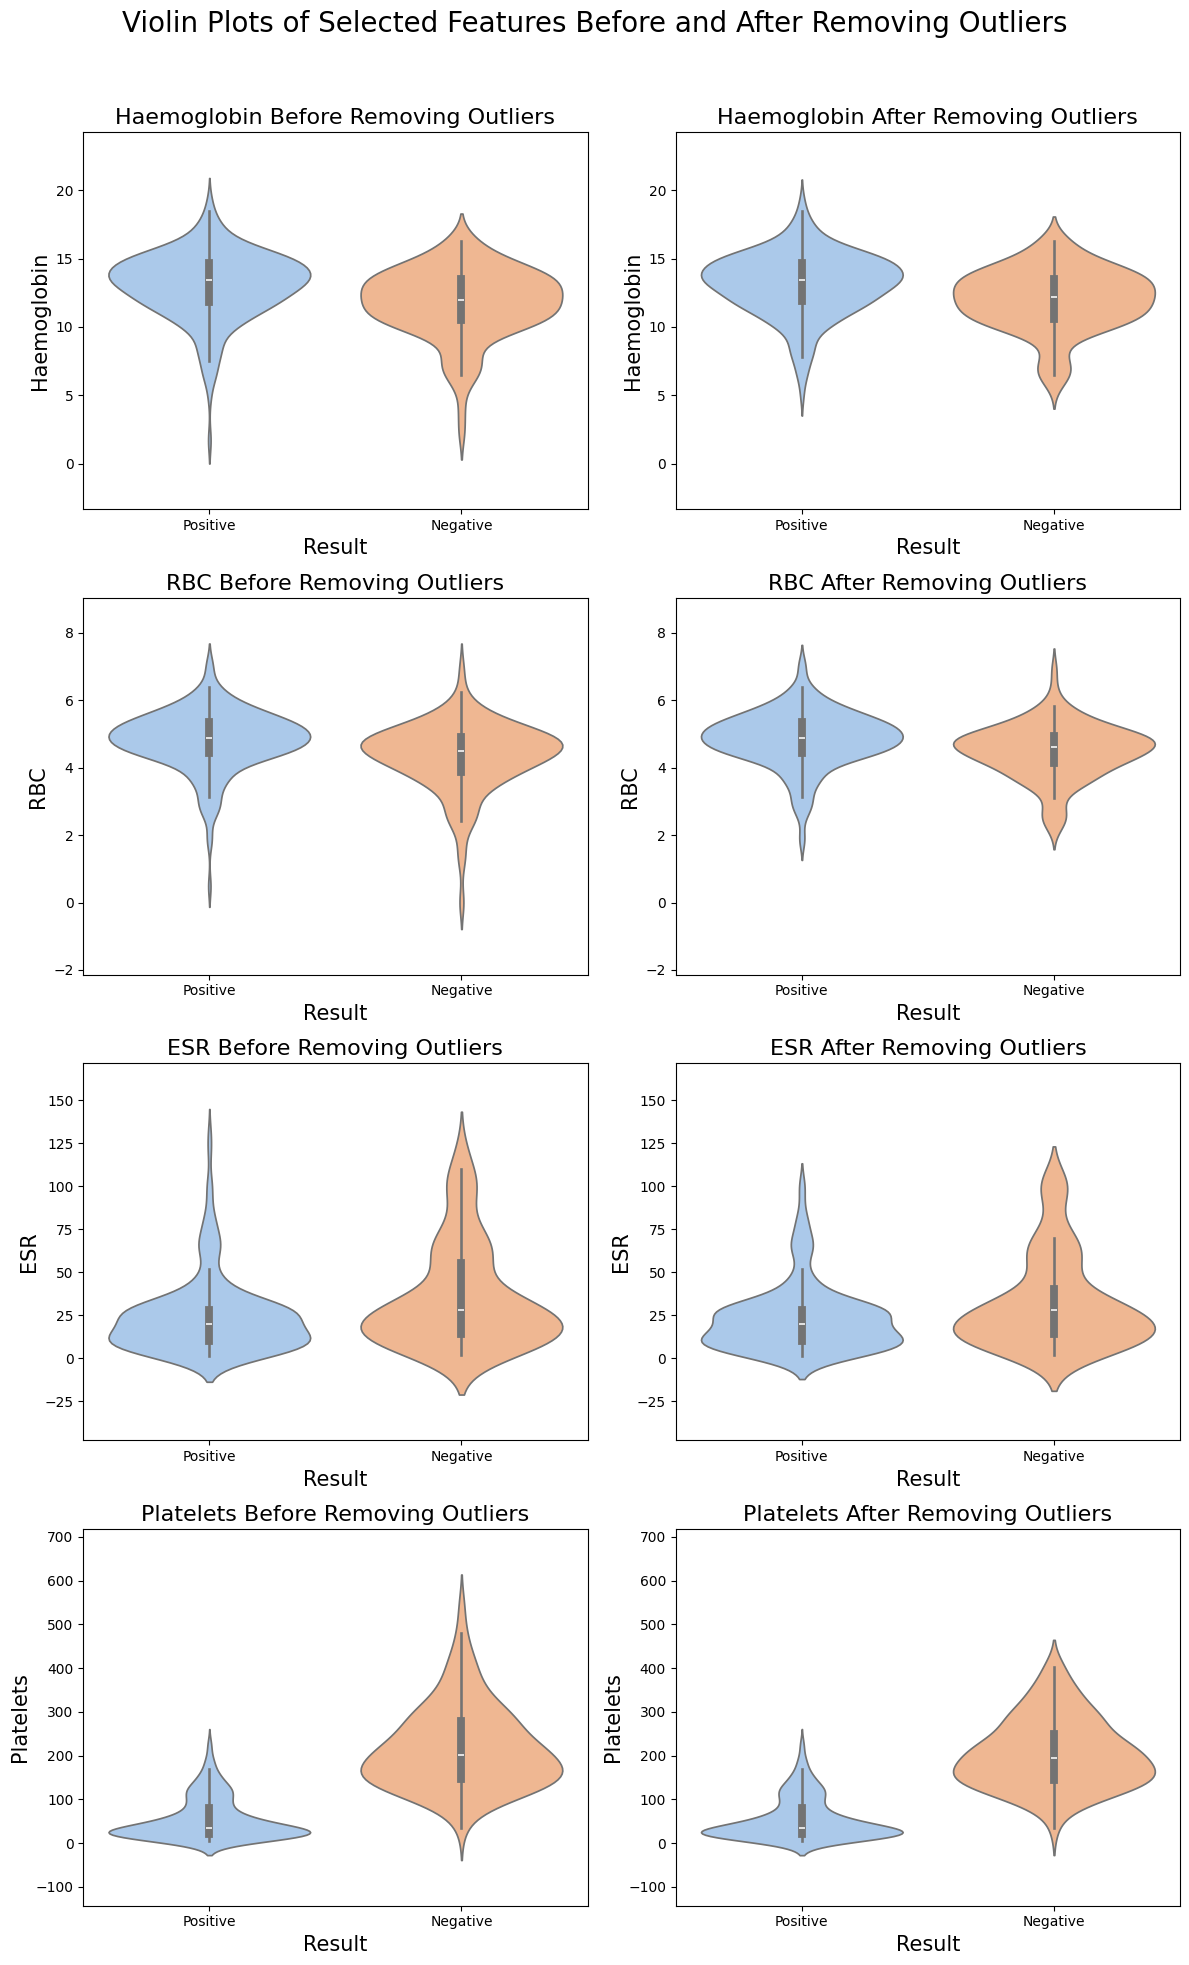

Original Dataset:
   Gender   Age  Haemoglobin        ESR    WBC  Neutrophil  Lymphocyte  \
0  Female  40.0         11.2  32.000000  11.30        65.0        23.0   
1    Male  13.0         11.6  59.000000   7.80        49.0        42.0   
2    Male  23.0         15.1  27.763838   3.85        65.0        25.0   
3    Male  58.0          8.5  27.763838  10.30        85.0         6.0   
4  Female  35.0         12.0  28.000000   6.70        54.0        20.0   

   Monocyte  Eosinophil  Basophil   RBC  Platelets    Result  
0      10.0         2.0       0.0  4.04         30  Positive  
1       9.0         0.0       0.0  4.34         40  Positive  
2       9.0         1.0       0.0  5.43         30  Positive  
3       6.0         3.0       0.0  3.00         30  Positive  
4       4.0         1.0       0.0  4.30         40  Positive  

Cleaned Dataset:
   Gender   Age  Haemoglobin        ESR    WBC  Neutrophil  Lymphocyte  \
0  Female  40.0         11.2  32.000000  11.30        65.0        2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the existing dataframe
# Example: data = pd.read_csv('your_dataset.csv')

# Define the specific features to check for outliers
features_to_check = ['Haemoglobin', 'RBC', 'ESR', 'Platelets']

# 1. Visualize outliers using violin plots for both classes in the 'Result' column
def plot_violinplots_before_after(df_before, df_after, target_column, features, title):
    fig, axes = plt.subplots(4, 2, figsize=(12, 20))
    sns.set_palette("pastel")
    for i, feature in enumerate(features):
        sns.violinplot(x=target_column, y=feature, data=df_before, ax=axes[i, 0], palette="pastel")
        sns.violinplot(x=target_column, y=feature, data=df_after, ax=axes[i, 1], palette="pastel")

        axes[i, 0].set_title(f'{feature} Before Removing Outliers', fontsize=16)
        axes[i, 0].set_xlabel('Result', fontsize=15)
        axes[i, 0].set_ylabel(feature, fontsize=15)

        axes[i, 1].set_title(f'{feature} After Removing Outliers', fontsize=16)
        axes[i, 1].set_xlabel('Result', fontsize=15)
        axes[i, 1].set_ylabel(feature, fontsize=15)

        # Adjust y-axis limits to show the full range of values
        ylim_before = axes[i, 0].get_ylim()
        ylim_after = axes[i, 1].get_ylim()
        ylim = (min(ylim_before[0], ylim_after[0]), max(ylim_before[1], ylim_after[1]))

        axes[i, 0].set_ylim(ylim[0] - 0.1*(ylim[1]-ylim[0]), ylim[1] + 0.1*(ylim[1]-ylim[0]))
        axes[i, 1].set_ylim(ylim[0] - 0.1*(ylim[1]-ylim[0]), ylim[1] + 0.1*(ylim[1]-ylim[0]))

    fig.suptitle(title, fontsize=20)
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

print("Visualizing before and after removing outliers:")

# 2. Remove outliers using the Z-score method for specific features
def remove_outliers_z_score(df, features, threshold=3):
    df_cleaned = df.copy()
    for feature in features:
        z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())
        df_cleaned = df_cleaned[z_scores < threshold]
    return df_cleaned

data_cleaned = remove_outliers_z_score(data, features_to_check)

# 3. Visualize the original and cleaned datasets to compare outliers removal
plot_violinplots_before_after(data, data_cleaned, 'Result', features_to_check, "Violin Plots of Selected Features Before and After Removing Outliers")

# Optionally, display the first few rows of the original and cleaned datasets
print("Original Dataset:")
print(data.head())
print("\nCleaned Dataset:")
print(data_cleaned.head())


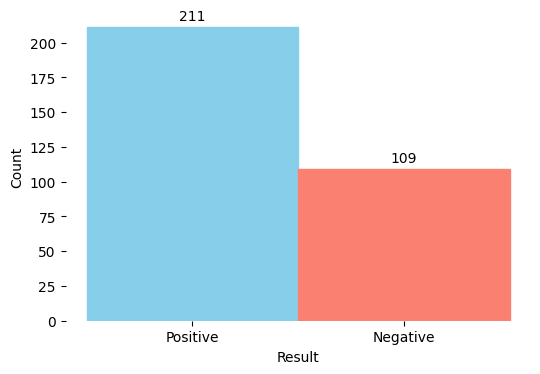

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'Result' column

# Define the figure size
plt.figure(figsize=(6, 4))

# Create the histogram
ax = sns.histplot(data=data, x="Result", color='Orange', binwidth=0.5)  # Adjust binwidth to control space between bars

# Add count labels over each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

# Set different colors for bars
colors = ['skyblue', 'salmon']
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i % len(colors)])

# Remove spines
sns.despine(ax=ax, left=True, bottom=True)

plt.show()


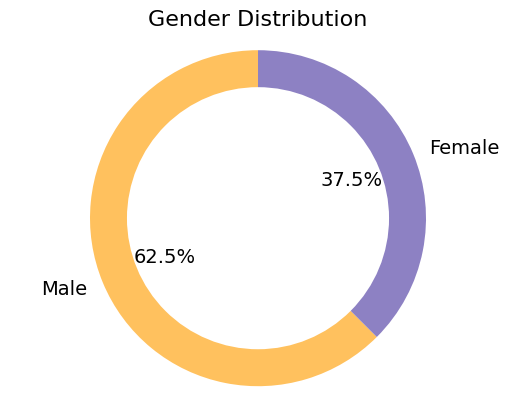

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'gender' column

# Count the occurrences of each gender
gender_counts = data['Gender'].value_counts()

# Extract labels and counts
labels = gender_counts.index.tolist()
sizes = gender_counts.values.tolist()

# Create a pie chart
fig, ax = plt.subplots()

# Define custom colors for the "holo" effect
colors = [   '#FFC15E', '#8D81C3']

# Increase the font size of the labels and percentage text
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 14})

# Draw a circle at the center of pie to make it look like a "hole"
centre_circle = plt.Circle((0,0),0.78,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Increase the font size of the title
plt.title('Gender Distribution', fontsize=16)
plt.show()


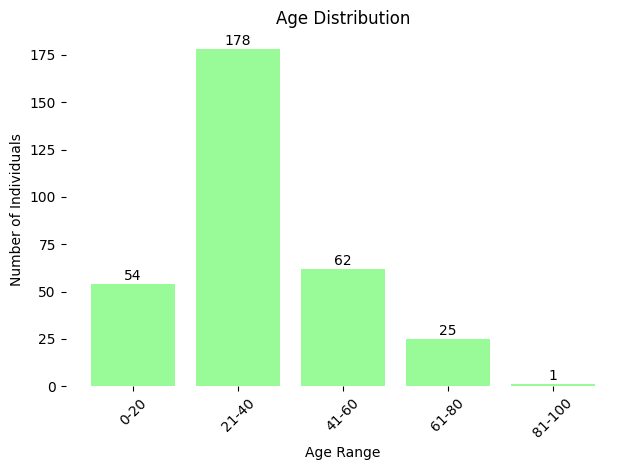

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'Age' column

# Define age ranges
age_ranges = [(0, 20), (21, 40), (41, 60), (61, 80), (81, 100)]

# Count the occurrences of ages within each range
age_counts = [((data['Age'] >= start) & (data['Age'] <= end)).sum() for start, end in age_ranges]

# Define the labels for the age ranges
labels = [f'{start}-{end}' for start, end in age_ranges]

# Create a histogram
bars = plt.bar(labels, age_counts, color='#98FB98', edgecolor='none')  # No border line

# Add counts above each bar
for bar, count in zip(bars, age_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, count,
             ha='center', va='bottom')

# Add labels and title
plt.xlabel('Age Range')
plt.ylabel('Number of Individuals')
plt.title('Age Distribution')

# Remove border
plt.box(False)  # or plt.axis('off')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()  # This line is optional and adjusts the layout
plt.show()


<ipython-input-31-56cc33ecf08d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Result", y="Haemoglobin", data=data, palette=light_palette)
<ipython-input-31-56cc33ecf08d>:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.violinplot(x="Result", y="Haemoglobin", data=data, palette=light_palette)
<ipython-input-31-56cc33ecf08d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Result", y="RBC", data=data, palette=light_palette)
<ipython-input-31-56cc33ecf08d>:20: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.violinplot(x="Result", y="RBC", data=data, palette=light_palet

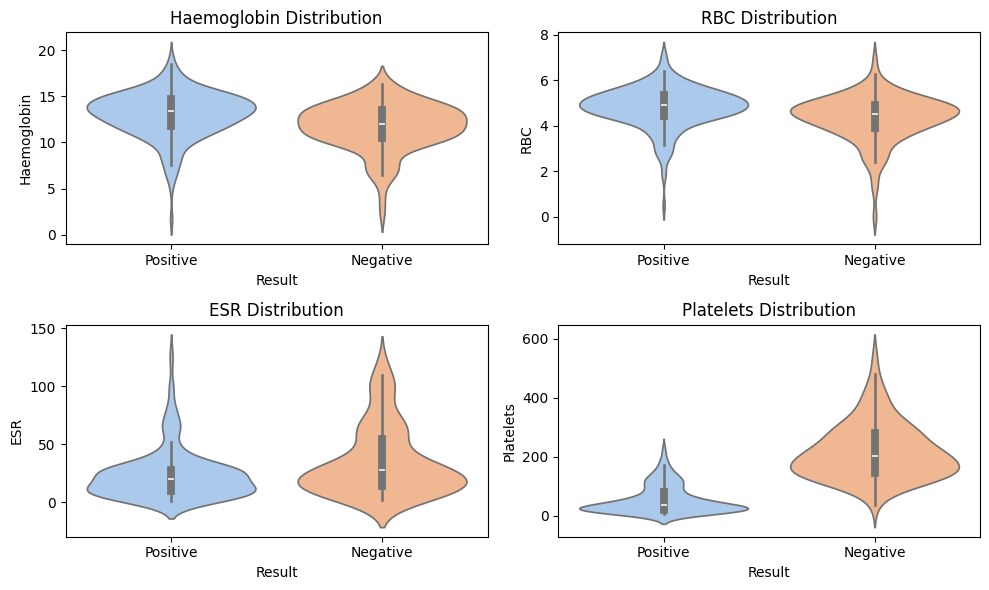

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing 'Haemoglobin', 'RBC', 'ESR', 'Platelets', and 'Result' columns

# Define a light color palette
light_palette = sns.color_palette("pastel")

# Create violin plots
plt.figure(figsize=(10, 6))

# Haemoglobin
plt.subplot(2, 2, 1)
sns.violinplot(x="Result", y="Haemoglobin", data=data, palette=light_palette)
plt.title('Haemoglobin Distribution')

# RBC
plt.subplot(2, 2, 2)
sns.violinplot(x="Result", y="RBC", data=data, palette=light_palette)
plt.title('RBC Distribution')

# ESR
plt.subplot(2, 2, 3)
sns.violinplot(x="Result", y="ESR", data=data, palette=light_palette)
plt.title('ESR Distribution')

# Platelets
plt.subplot(2, 2, 4)
sns.violinplot(x="Result", y="Platelets", data=data, palette=light_palette)
plt.title('Platelets Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

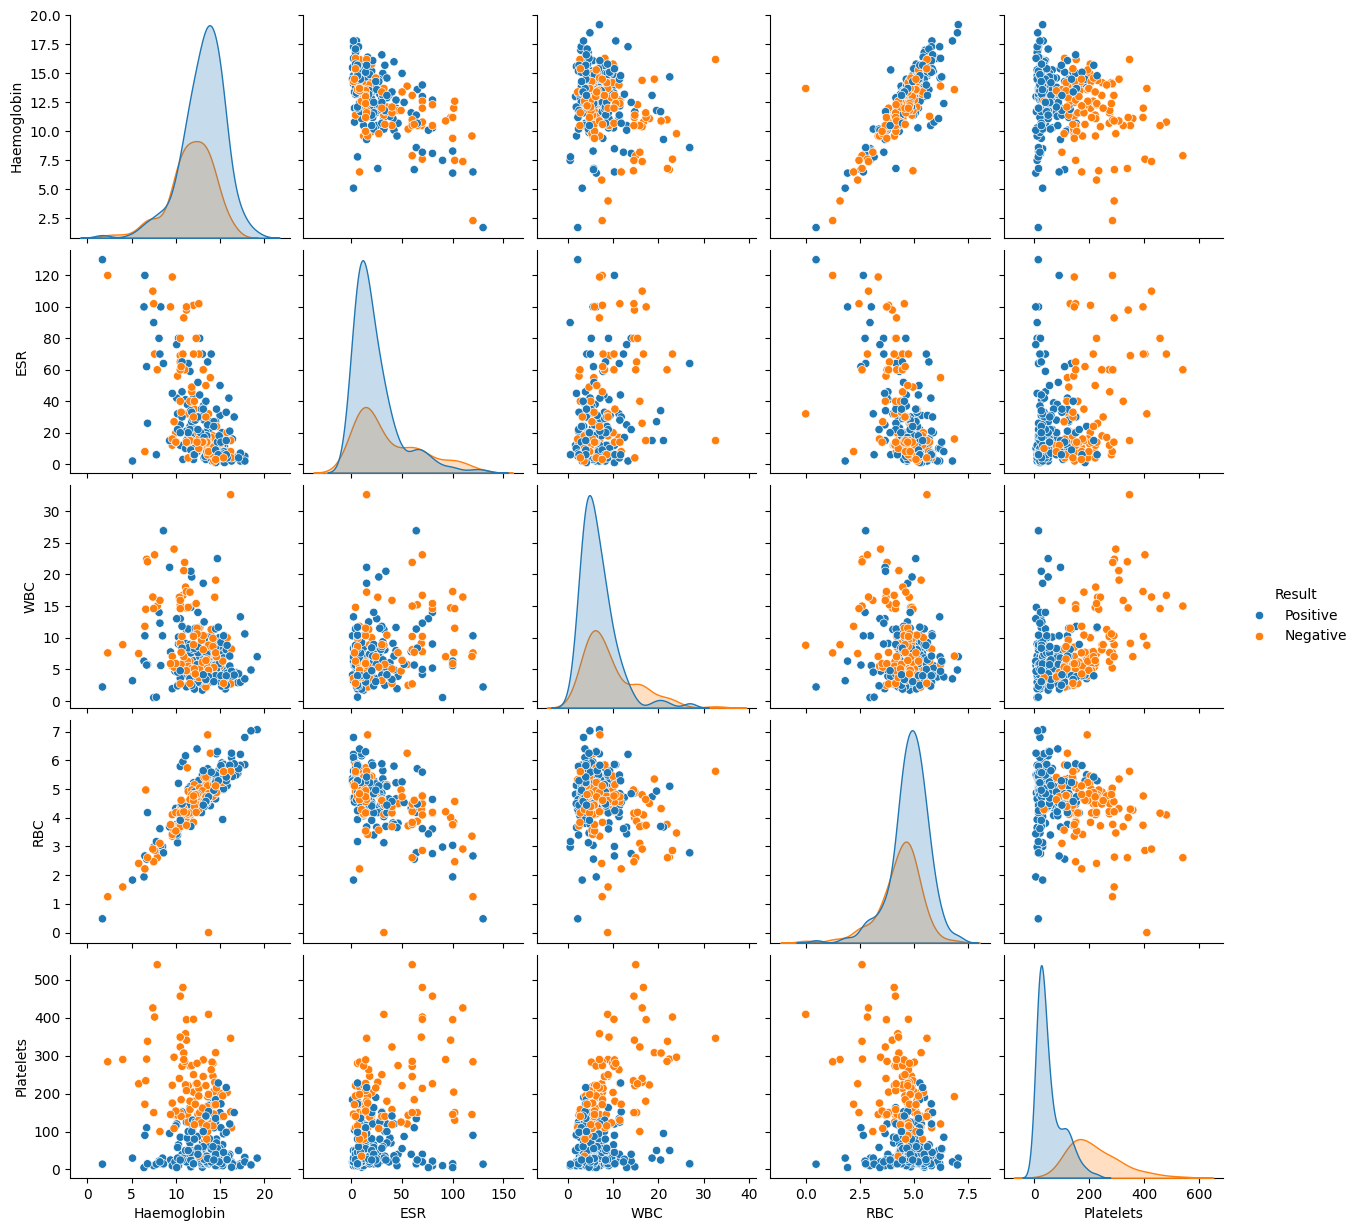

In [ ]:
plt.figure()
sns.pairplot(data,vars=['Haemoglobin','ESR','WBC','RBC','Platelets'],hue='Result',height=2.5)
plt.show()

<ipython-input-23-9aef96147bdb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr(method='pearson')


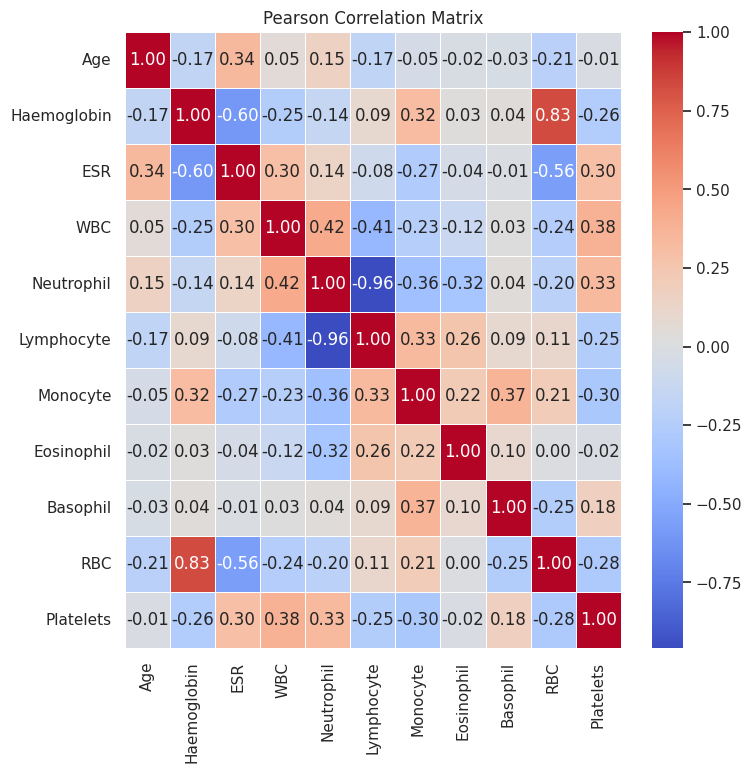

In [ ]:
# Calculate the Pearson correlation matrix
correlation_matrix = data.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

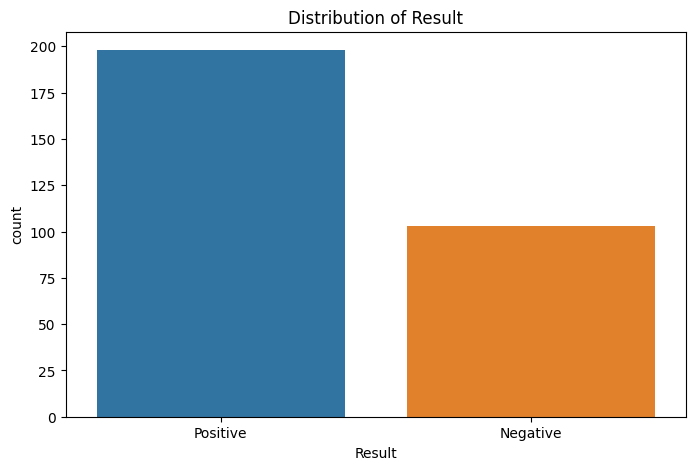

In [ ]:
# Visualize distribution of the target class
plt.figure(figsize=(8, 5))
sns.countplot(x='Result', data=data)
plt.title('Distribution of Result')
plt.show()




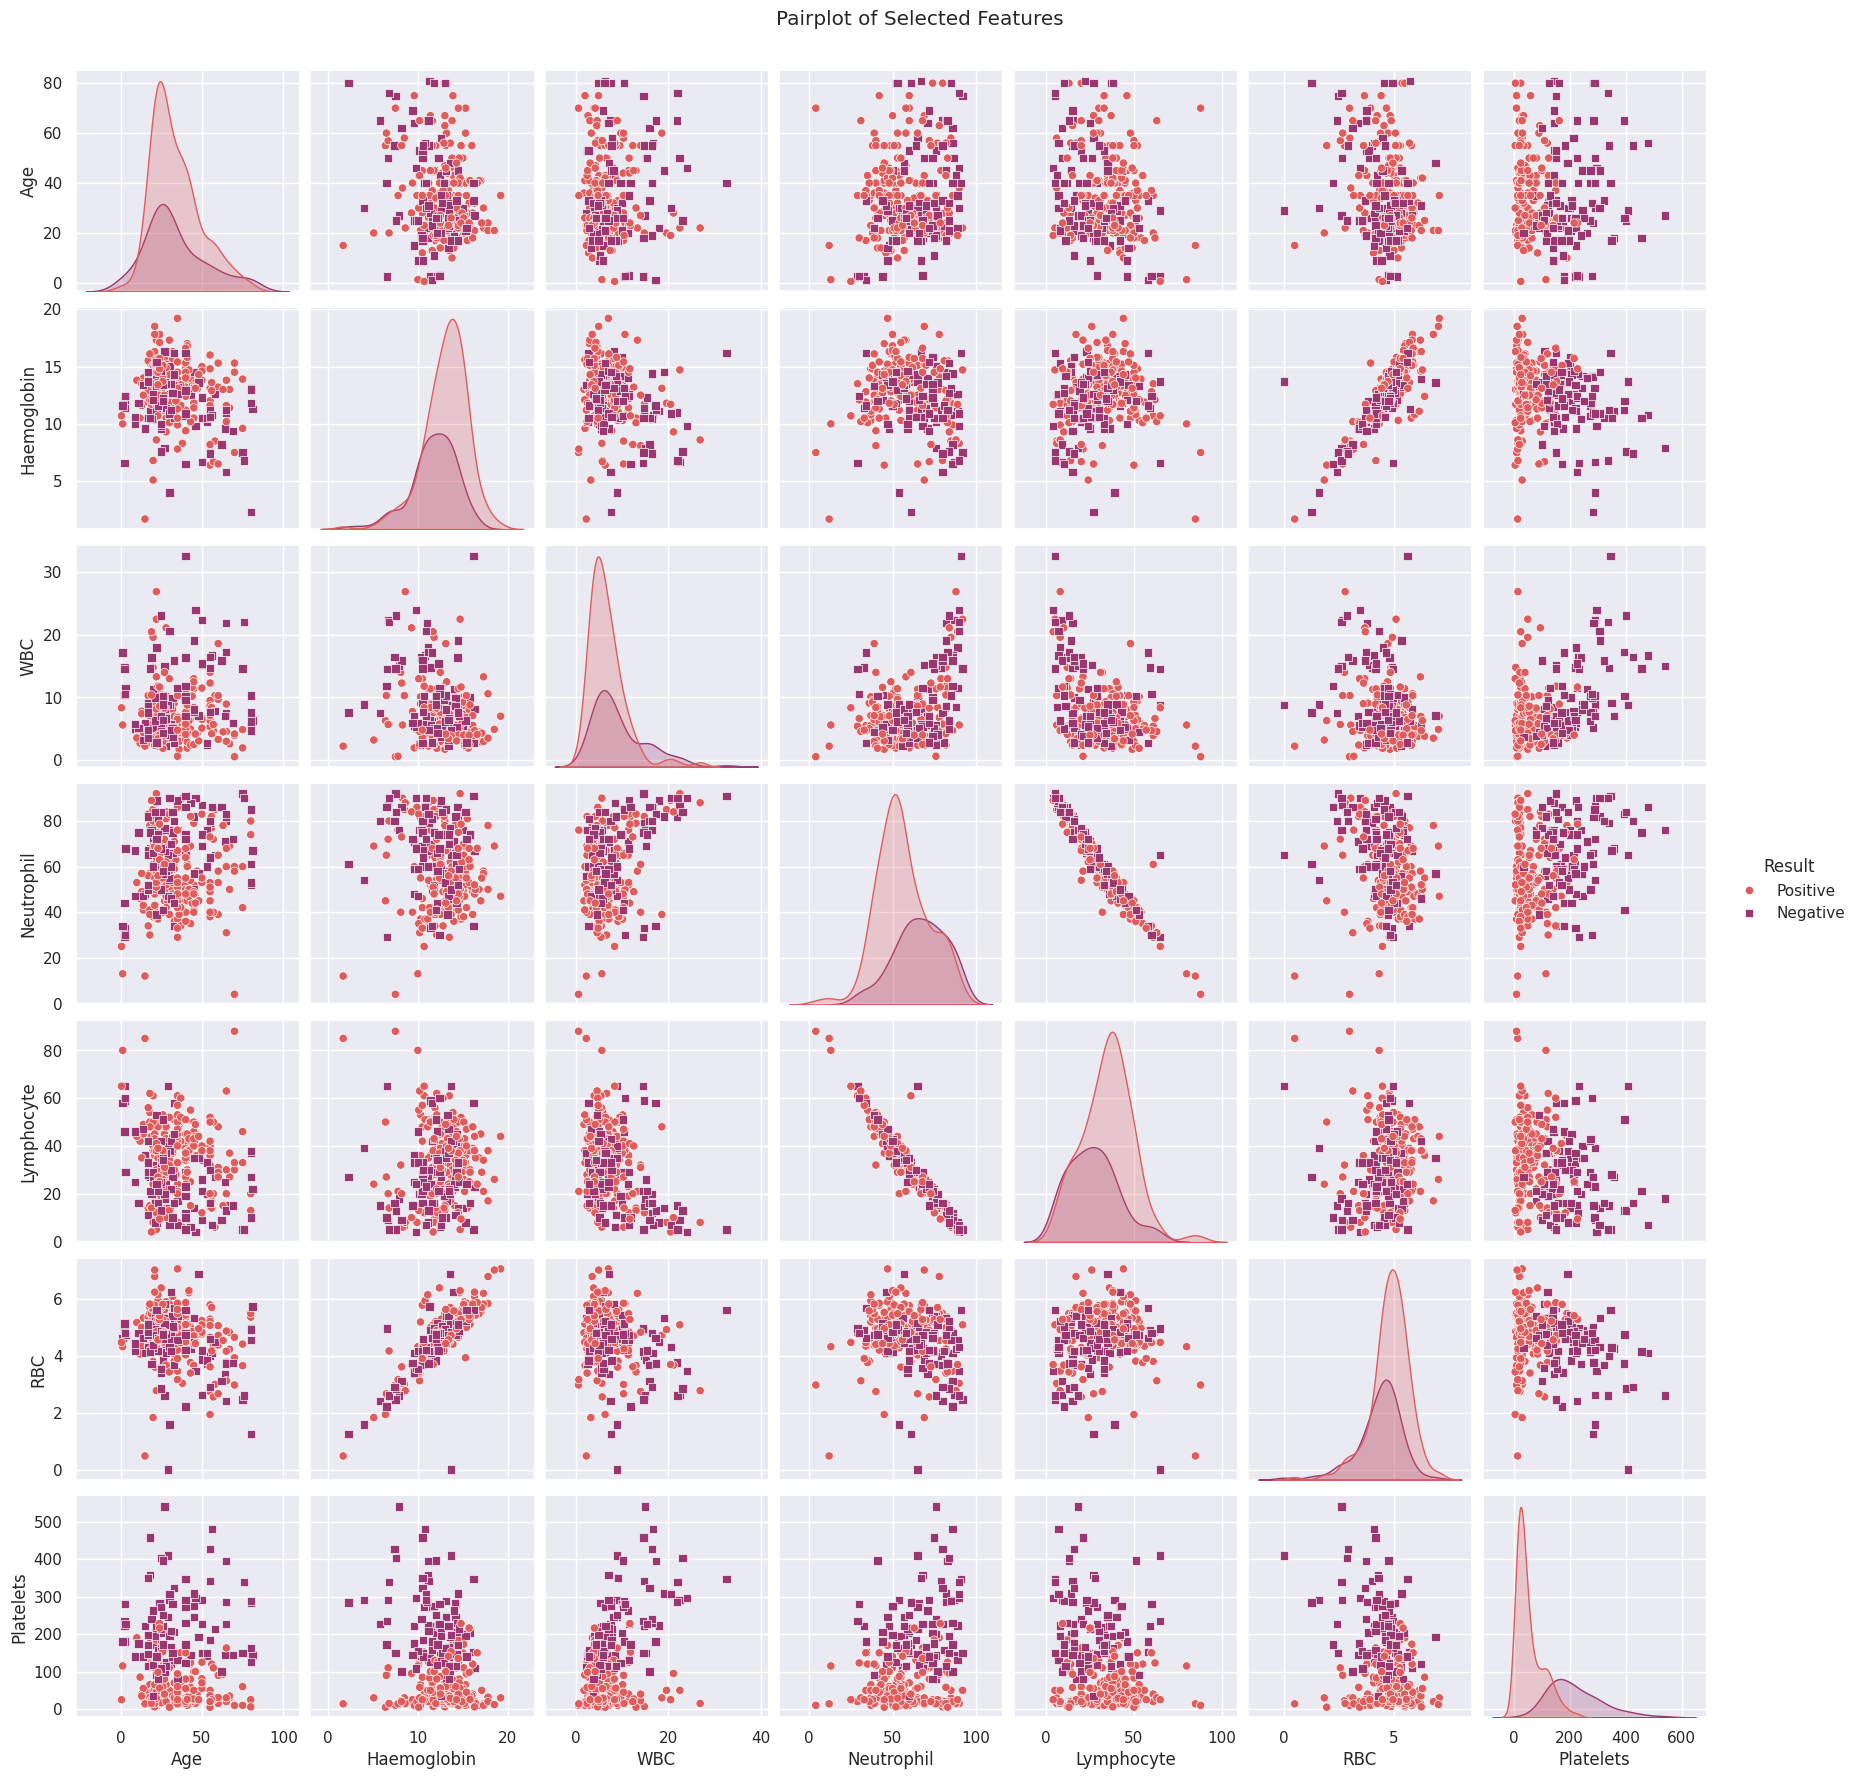

In [ ]:
# Pairplot for selected features
selected_features = ['Age', 'Haemoglobin', 'WBC', 'Neutrophil', 'Lymphocyte', 'RBC', 'Platelets', 'Result']
sns.pairplot(data[selected_features], hue='Result', markers=["o", "s"], palette="flare")
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

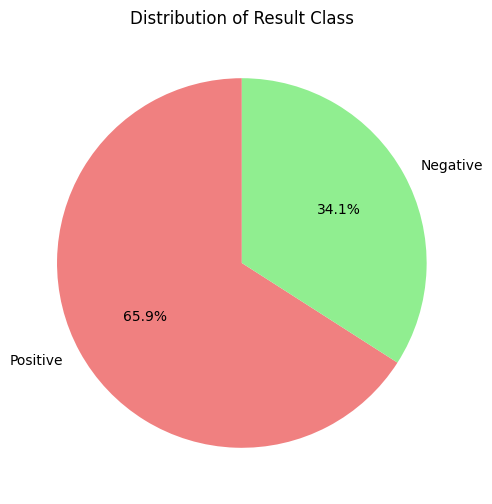

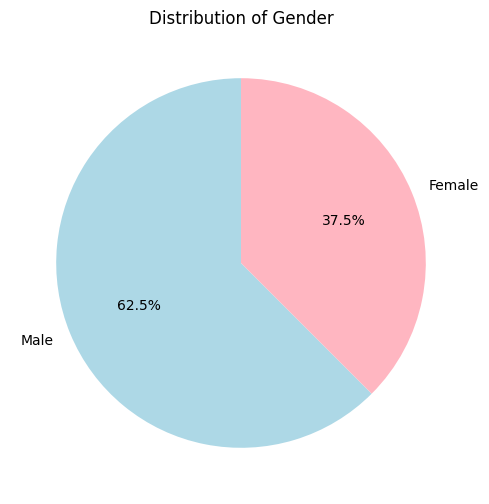

In [ ]:
# Visualize pie chart for the distribution of 'Result' class
result_counts = data['Result'].value_counts()
labels = result_counts.index
sizes = result_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Result Class')
plt.show()



gender_counts = data['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Distribution of Gender')
plt.show()